In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Importing All Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, log_loss, roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, precision_score, recall_score, f1_score

# 2. Loading the Dataset

In [4]:
# Provide the path to the dataset on your Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Dev_data_to_be_shared.csv'

data = pd.read_csv(file_path)


In [5]:
data.head()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data['bad_flag']

,bad_flag
0,0
1,0
2,0
3,0
4,0
...,...
96801,0
96802,0
96803,0
96804,0


In [7]:
data['bad_flag'].value_counts()       # Data is Highly imbalance

,count
bad_flag,
0,95434
1,1372


In [8]:
data.shape

(96806, 1216)

In [9]:
data.info()              # all attributes have int and float value , none of them have object dtype so no problem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Columns: 1216 entries, account_number to onus_attribute_48
dtypes: float64(1189), int64(27)
memory usage: 898.1 MB


In [10]:
data['bad_flag'].isnull().sum()             # Checking For missing value in Target Variable

0

In [11]:
data['account_number'].duplicated().sum()   # Checking for duplicate data

0

In [12]:
# Checking For null values in other Attributes

data.isnull().sum()

,0
account_number,0
bad_flag,0
onus_attribute_1,25231
transaction_attribute_1,25231
transaction_attribute_2,25231
...,...
onus_attribute_44,85196
onus_attribute_45,85196
onus_attribute_46,85196
onus_attribute_47,85196


In [13]:
data.shape

(96806, 1216)

# 3. Removing Columns with Excessive Missing Data

In [14]:
# Function to remove attributes with more than 60% missing values
def remove_high_missing_columns(df, threshold=0.6):
    missing_ratio = df.isnull().mean()
    columns_to_drop = missing_ratio[missing_ratio > threshold].index
    print(f"Removing columns with more than {threshold*100}% missing values: {list(columns_to_drop)}")
    return df.drop(columns=columns_to_drop)


In [15]:
# Apply the function to remove columns with more than 60% missing values
data = remove_high_missing_columns(data)

Removing columns with more than 60.0% missing values: ['bureau_148', 'bureau_433', 'bureau_435', 'bureau_436', 'bureau_437', 'bureau_438', 'bureau_444', 'bureau_446', 'bureau_447', 'bureau_448', 'bureau_449', 'onus_attribute_43', 'onus_attribute_44', 'onus_attribute_45', 'onus_attribute_46', 'onus_attribute_47', 'onus_attribute_48']


In [16]:
data.shape       # 1216-1199 column removed

(96806, 1199)

#  4. Replace missing values with the Median

In [17]:
# Function to replace missing values with the median
def replace_missing_with_median(df):
    print("Replacing missing values with median...")
    return df.fillna(df.median())

In [18]:
# Apply the function to replace missing values with median
data = replace_missing_with_median(data)

Replacing missing values with median...


In [19]:
data.head()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_41,bureau_enquiry_42,bureau_enquiry_43,bureau_enquiry_44,bureau_enquiry_45,bureau_enquiry_46,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50
0,1,0,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,11.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.0,0.0,38.0,0.0,6.0,0.0,0.0,0.0,0.0,30.0
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 5. Train-Test Split

In [20]:
# Separate target variable and features
target = 'bad_flag'
features = [col for col in data.columns if col != target and col != 'account_number']

In [21]:
# Split data into train and test sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
X_train.shape


(77444, 1197)

In [23]:
X_test.shape

(19362, 1197)

In [24]:
y.value_counts()       # Data is Highly imbalance

,count
bad_flag,
0,95434
1,1372


In [25]:
y.shape

(96806,)

# 6. SMOTE to oversample the minority class

In [26]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote_1, y_train_smote = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [27]:
# Shift data to make it non-negative
min_values = X_train_smote_1.min(axis=0)  # Find minimum values in each column
X_train_smote = X_train_smote_1 + abs(min_values) if any(min_values < 0) else X_train_smote_1

In [28]:
X_train_smote.shape

(152692, 1197)

In [29]:
y_train_smote.value_counts()

,count
bad_flag,
0,76346
1,76346


In [30]:
y_train_smote.shape

(152692,)

# 7. Standardization

In [31]:
# Standardize the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled.shape

(152692, 1197)

In [33]:
X_test_scaled.shape

(19362, 1197)

# 8. Feature selection using PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=50)  # Retain top 50 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [36]:
X_train_pca.shape

(152692, 50)

In [37]:
X_test_pca.shape

(19362, 50)

# 9. Loading Of validation dataset

In [38]:
val_file_path = '/content/drive/MyDrive/Colab Notebooks/validation_data_to_be_shared.csv'

val_data = pd.read_csv(val_file_path)

In [39]:
val_data.head()

,account_number,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,100001,34000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,130000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
3,100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,53000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
val_data.shape

(41792, 1215)

In [41]:
# Droping the same columns in the validation dataset which have missing data more tha 60%
val_data.drop(columns=['bureau_148', 'bureau_433', 'bureau_435', 'bureau_436', 'bureau_437', 'bureau_438', 'bureau_444', 'bureau_446', 'bureau_447', 'bureau_448', 'bureau_449', 'onus_attribute_43', 'onus_attribute_44', 'onus_attribute_45', 'onus_attribute_46', 'onus_attribute_47', 'onus_attribute_48'], inplace=True)

In [42]:
val_data.shape

(41792, 1198)

In [43]:
val_data.fillna(data.median(), inplace=True)  # Replace missing values with training data median

In [44]:
# Preprocess validation dataset
val_data_scaled = scaler.transform(val_data[features])  # Standardize

In [45]:
val_data_pca = pca.transform(val_data_scaled)  # Apply PCA

# 10. Building the Models: Logistic Regression

In [46]:
# Train and evaluate Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_pca, y_train_smote)
lr_y_pred = lr_model.predict(X_test_pca)
lr_y_pred_proba = lr_model.predict_proba(X_test_pca)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_y_pred_proba)
lr_auc = roc_auc_score(y_test, lr_y_pred_proba)
print(f"Logistic Regression AUC-ROC: {lr_auc:.4f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_y_pred))

Logistic Regression AUC-ROC: 0.8126
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96     19088
           1       0.06      0.27      0.10       274

    accuracy                           0.93     19362
   macro avg       0.52      0.61      0.53     19362
weighted avg       0.98      0.93      0.95     19362



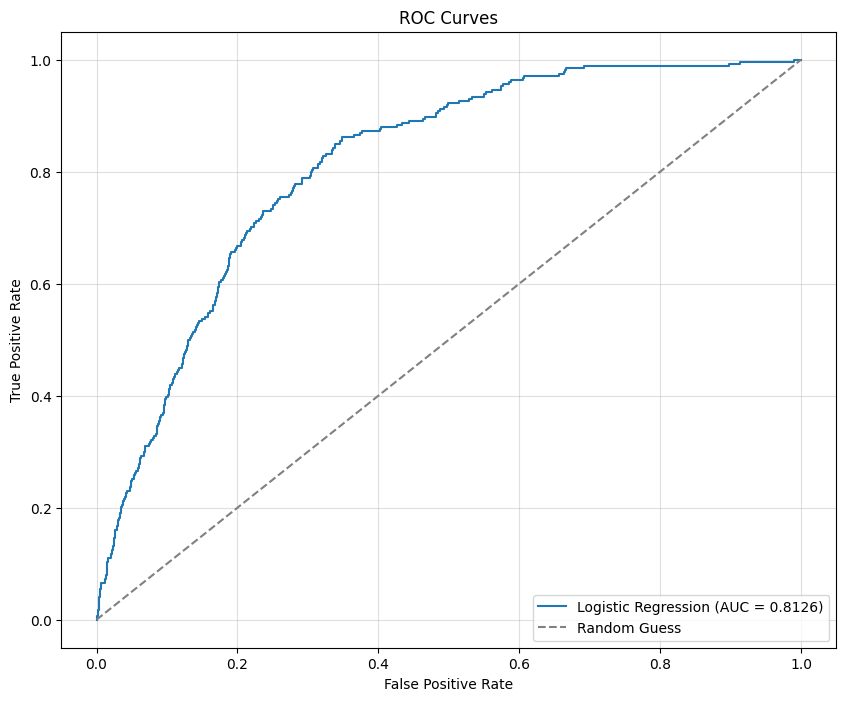

In [47]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.show()

In [48]:
lr_y_pred[0:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [49]:
lr_y_pred_proba[0:10]

array([0.05368337, 0.08796054, 0.12415767, 0.21780098, 0.79900536,
       0.36784015, 0.08124553, 0.09396387, 0.05205321, 0.08963915])

# 11. Prediction on Validation Dataset


In [50]:
lr_y_pred_val = lr_model.predict(val_data_pca)

In [51]:
lr_y_pred_proba_val = lr_model.predict_proba(val_data_pca)[:, 1]

In [52]:
lr_y_pred_val[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [53]:
lr_y_pred_proba_val[0:10]

array([0.43332939, 0.04936669, 0.03608027, 0.05579288, 0.48825875,
       0.73534179, 0.03194172, 0.07688869, 0.35305583, 0.2292126 ])

# 12. Creating CSV FIle

In [54]:
# Create a DataFrame with account_number and the predicted probability
result_df = pd.DataFrame({
    'account_number': val_data['account_number'],
    'Predicted Probability': lr_y_pred_proba_val
})


In [55]:
result_df.head()

,account_number,Predicted Probability
0,100001,0.433329
1,100002,0.049367
2,100003,0.036080
3,100004,0.055793
4,100005,0.488259


In [56]:
# Save the DataFrame to a CSV file
result_df.to_csv('predicted_probabilities.csv', index=False)
print("CSV file with predicted probabilities has been saved.")

CSV file with predicted probabilities has been saved.
